# **Appliances Energy Prediction**


**Group Number : 10**

**Student Name: R.M.M.L.D. Rajapakshe**  
**Registration Number: EG/2021/4734**  

**Student Name: K.K.M.P Ranasinghe**  
**Registration Number: EG/2021/4734**  


# **01) Introduction**


In this project, we are tasked with predicting energy consumption in residential spaces using the **Appliances Energy Prediction** dataset. The dataset contains various environmental and indoor features, such as temperature, humidity, wind speed, and energy consumption of different appliances.

We will apply **Linear Regression** and **Decision Tree** models to predict the energy consumption (**Appliances**) based on these features. The main goal is to compare the performance of both models in predicting energy consumption and determine which one offers better accuracy.

**Data Link**: [https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction](https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction)  

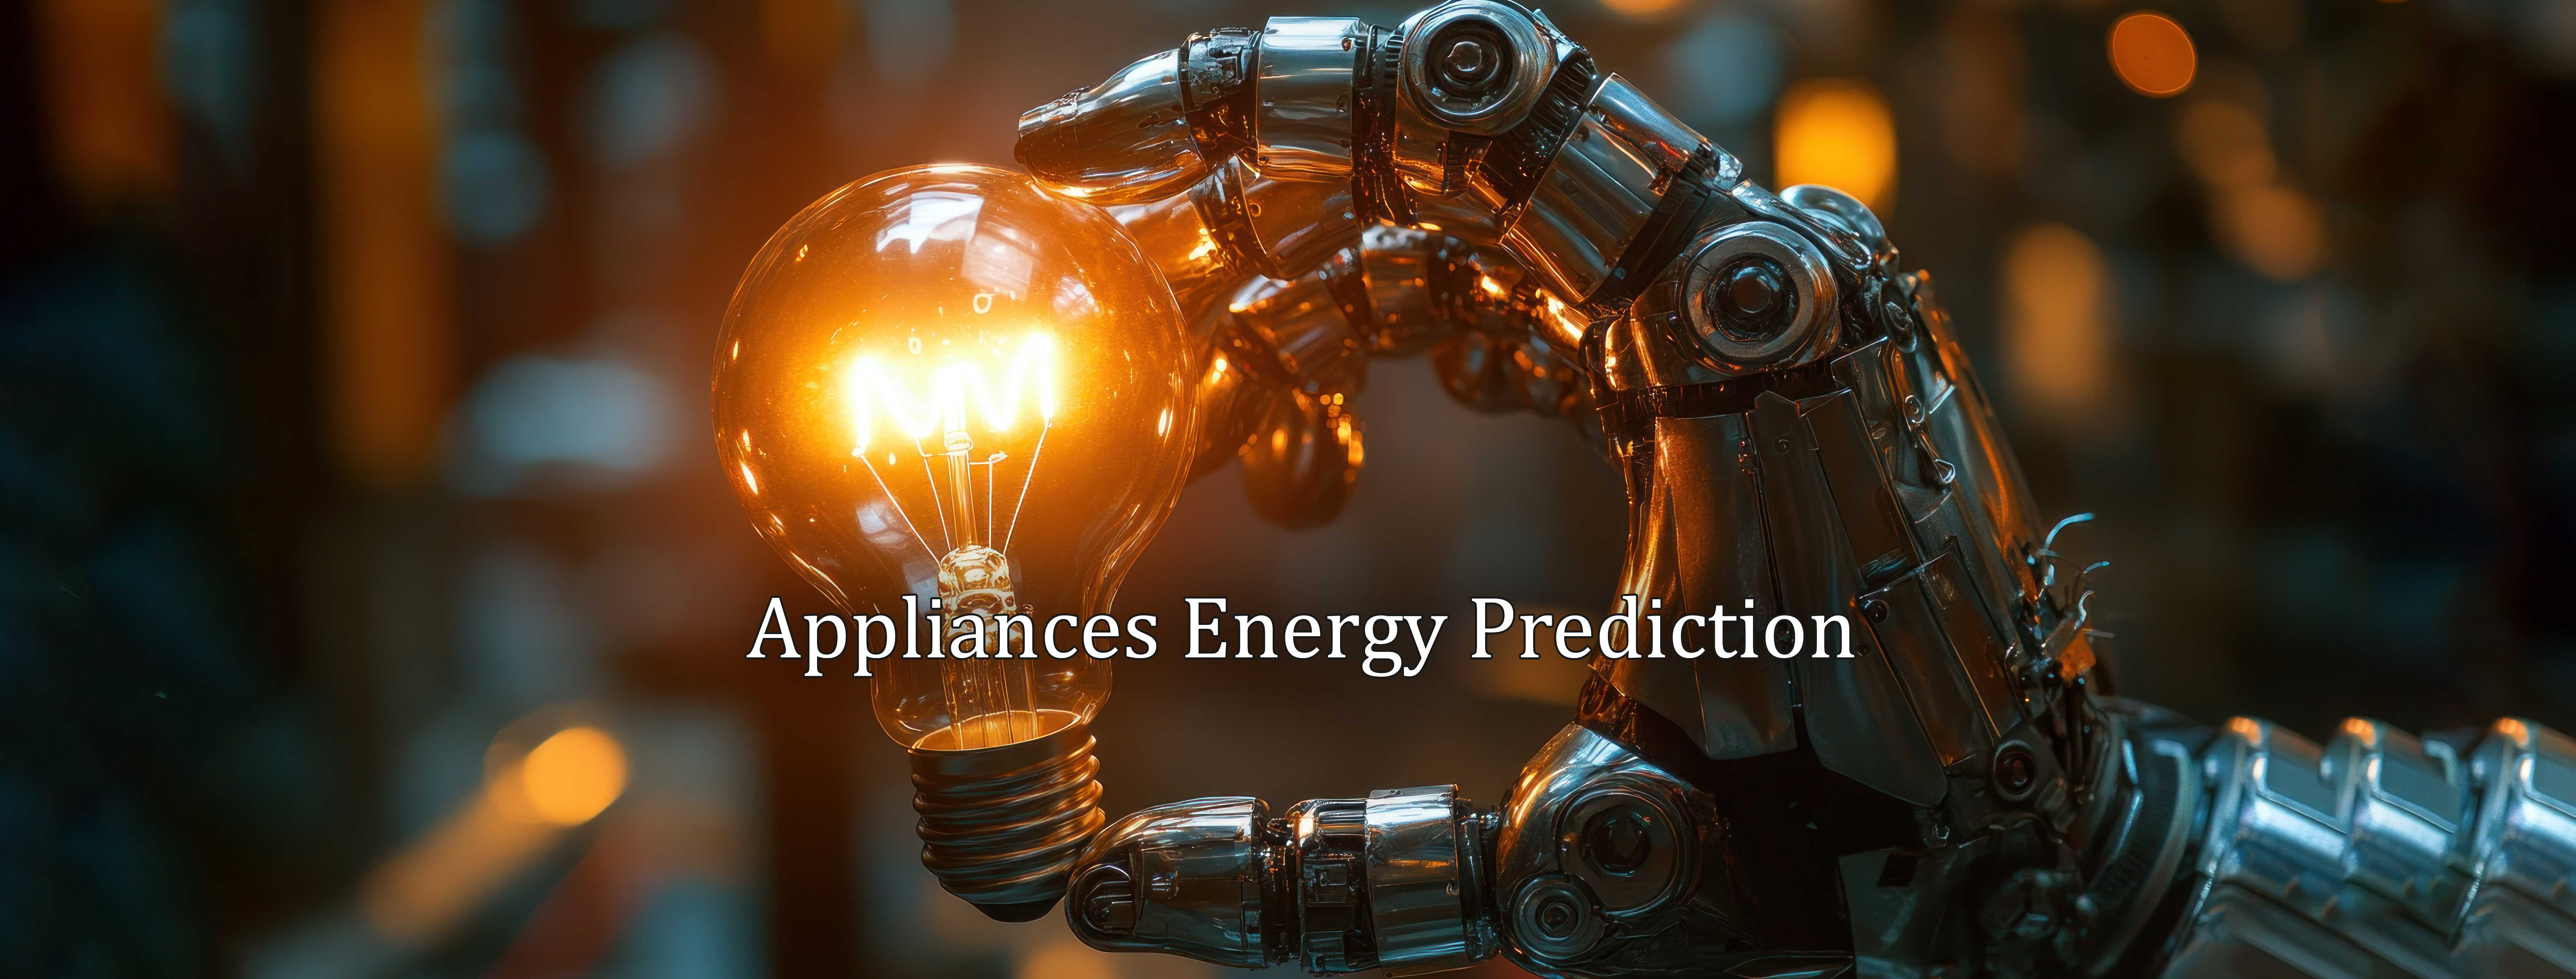

# **02) Dataset Description**

The **Appliances Energy Prediction** dataset is available from the UCI Machine Learning Repository. It contains various environmental and indoor features that influence energy consumption. Below is a list of key features in the dataset:

- **Appliances**: Energy consumption of appliances (target variable in Wh).
- **lights**: Energy consumption of lights (in Wh).
- **T1** to **T9**: Indoor temperatures in different rooms (numerical values).
- **RH_1** to **RH_9**: Relative humidity measurements in different rooms.
- **T_out**: Outside temperature.
- **Press_mm_hg**: Atmospheric pressure.
- **RH_out**: Outside relative humidity.
- **Windspeed**: Wind speed.
- **Visibility**: Visibility distance (in km).
- **Tdewpoint**: Dew point temperature.
- **rv1** and **rv2**: Additional random variables.

We will use this data to predict energy consumption and evaluate the performance of **Linear Regression** and **Decision Tree** models.


## **Load the Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


## **Data Loading**

In [ ]:
# Load the dataset
df = pd.read_csv('energydata_complete.csv')

# **04) Exploratory Data Analysis (EDA) and Some Feature Engineering**

In [ ]:
# 3. Dataset Description
print("\nInitial Dataset Information:")
print(df.info())

# Remove rv1 and rv2 because they are random variables
df.drop(columns=['rv1', 'rv2'], inplace=True)

# remove space in column names and make the letters lowercase
df.columns = [i.replace(" ", "_").lower() for i in df.columns]

# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Get only date remove time
df['date']= df['date'].dt.date

# Basic statistics for numeric columns
print("\nBasic Statistics:")
print(df[numeric_columns].describe())


Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         197

**General Information of the Data:**

- It is a **timeseries** data.
- All attributes except the **date** are **numerical variables**.
- There are **29 columns** and **19,735 instances**.
- Data does **not have null values**.
- Data does **not have any duplicates**.
- Data has a **wide range of values**.


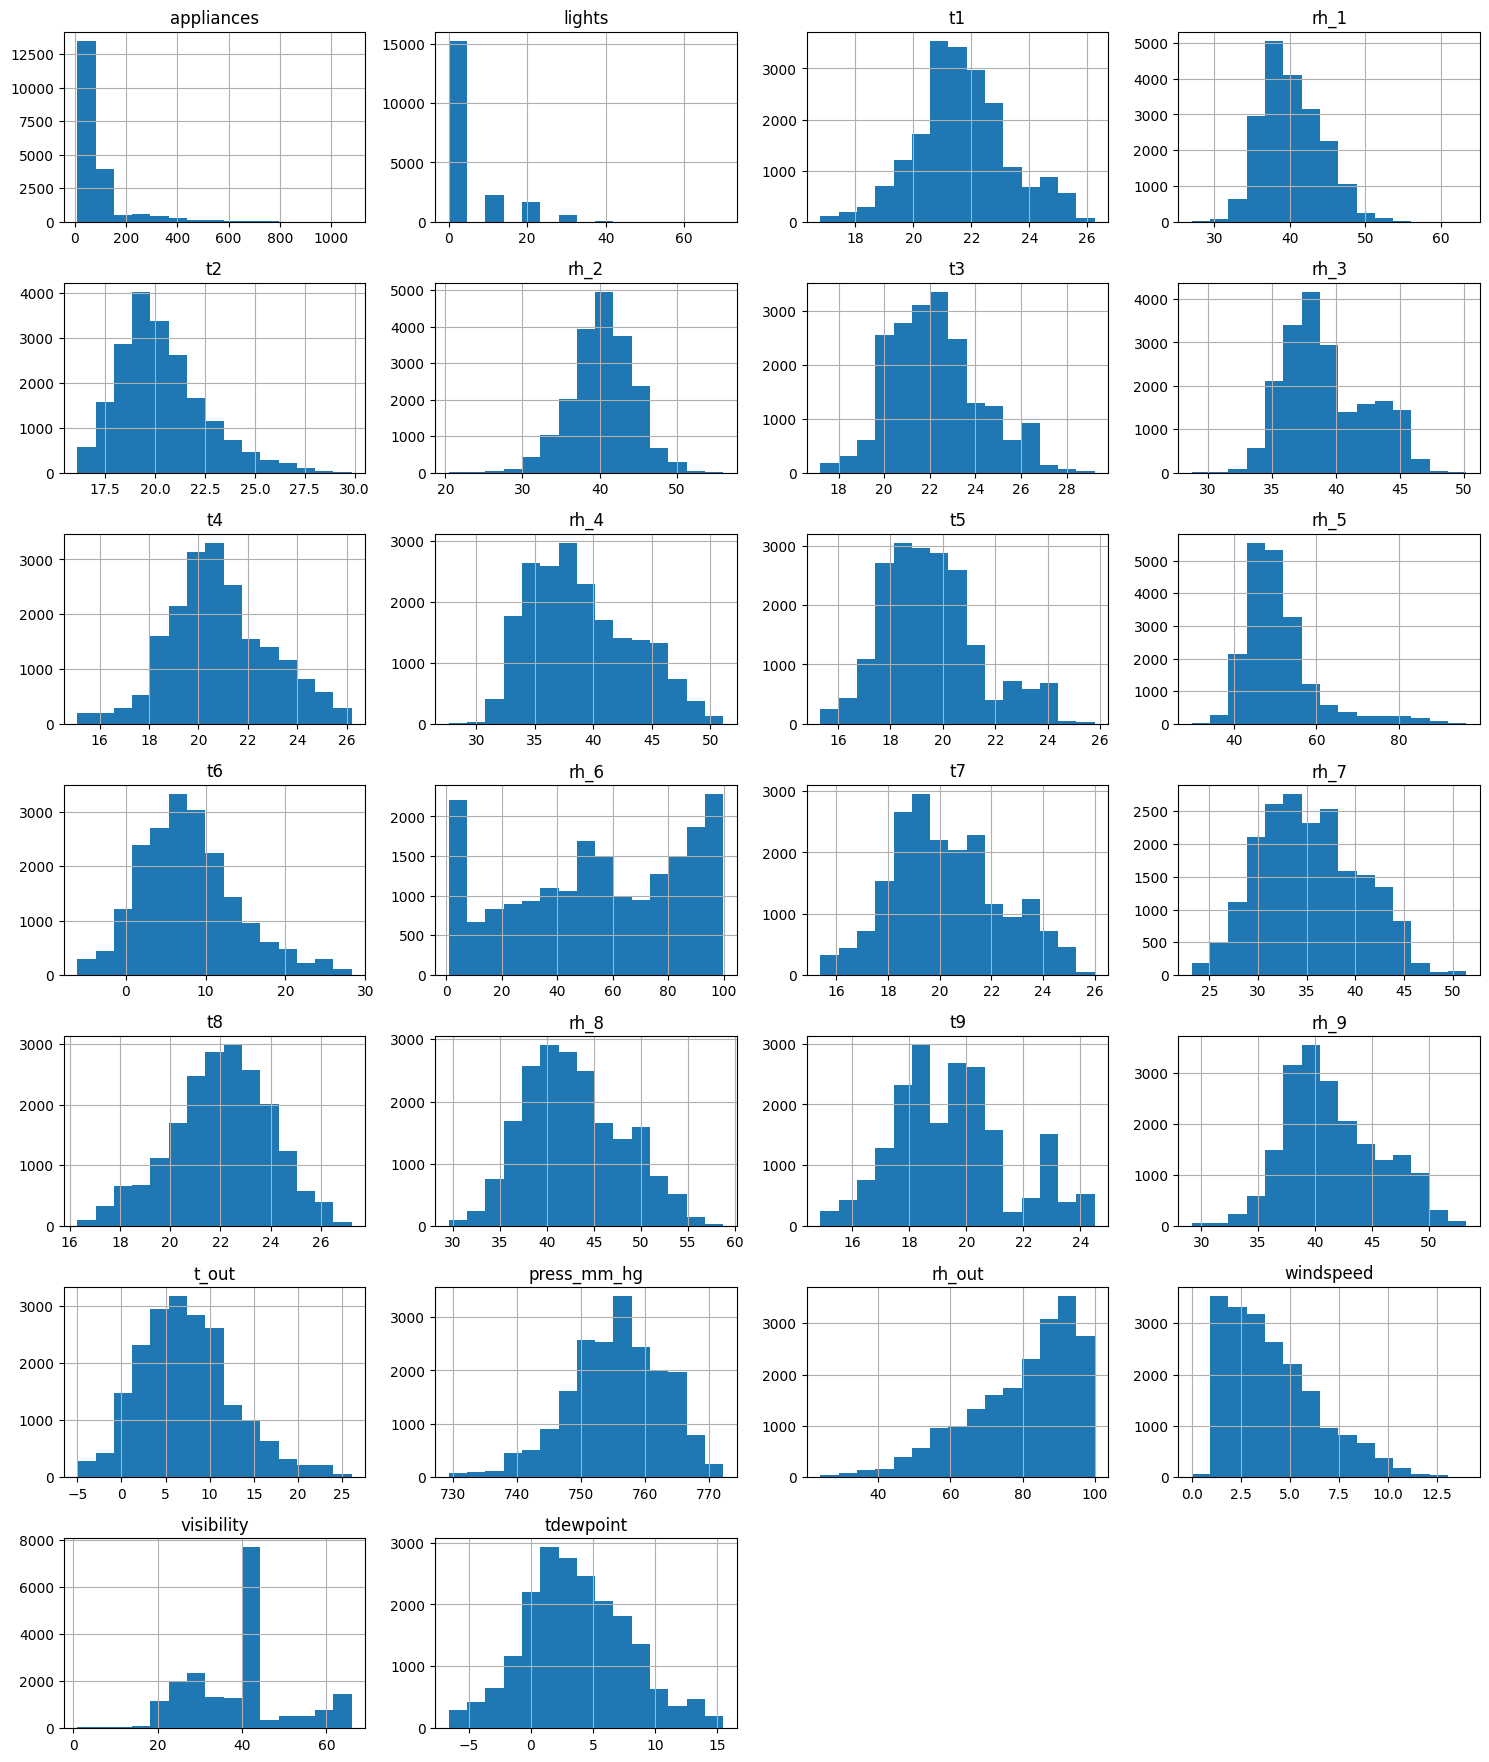

In [ ]:
# Adjust the layout to fit 31 plots
df.hist(bins=15, figsize=(15, 20), layout=(8, 4))
plt.tight_layout()
plt.show()


Text(0.5, 0, 'Energy Consumption (Wh)')

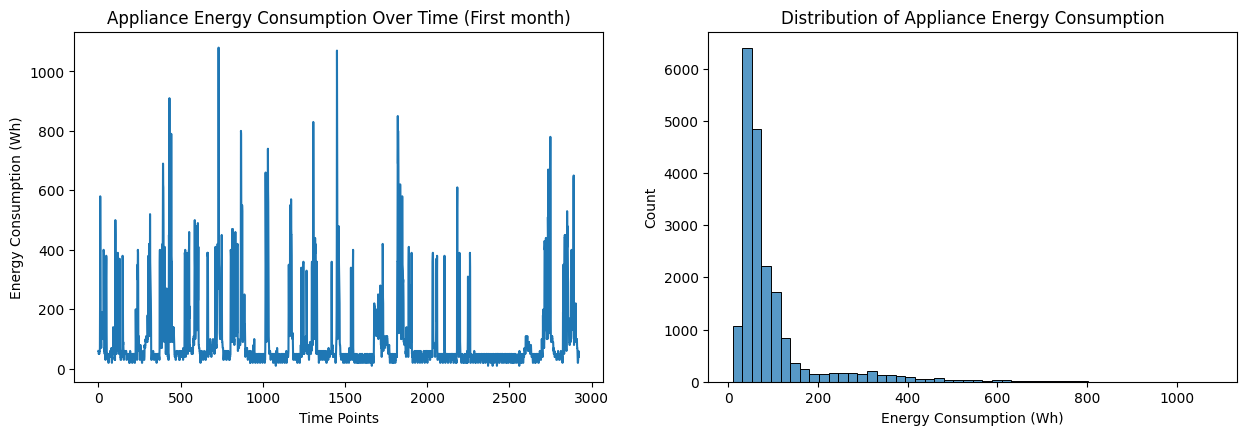

In [ ]:
plt.figure(figsize=(15, 10))

# Time series plot of appliance energy consumption
plt.subplot(2, 2, 1)
plt.plot(df['appliances'].values[:2923])
plt.title('Appliance Energy Consumption Over Time (First month)')
plt.xlabel('Time Points')
plt.ylabel('Energy Consumption (Wh)')

# Distribution of appliance energy consumption
plt.subplot(2, 2, 2)
sns.histplot(df['appliances'], bins=50)
plt.title('Distribution of Appliance Energy Consumption')
plt.xlabel('Energy Consumption (Wh)')


##**Checking Outliers**

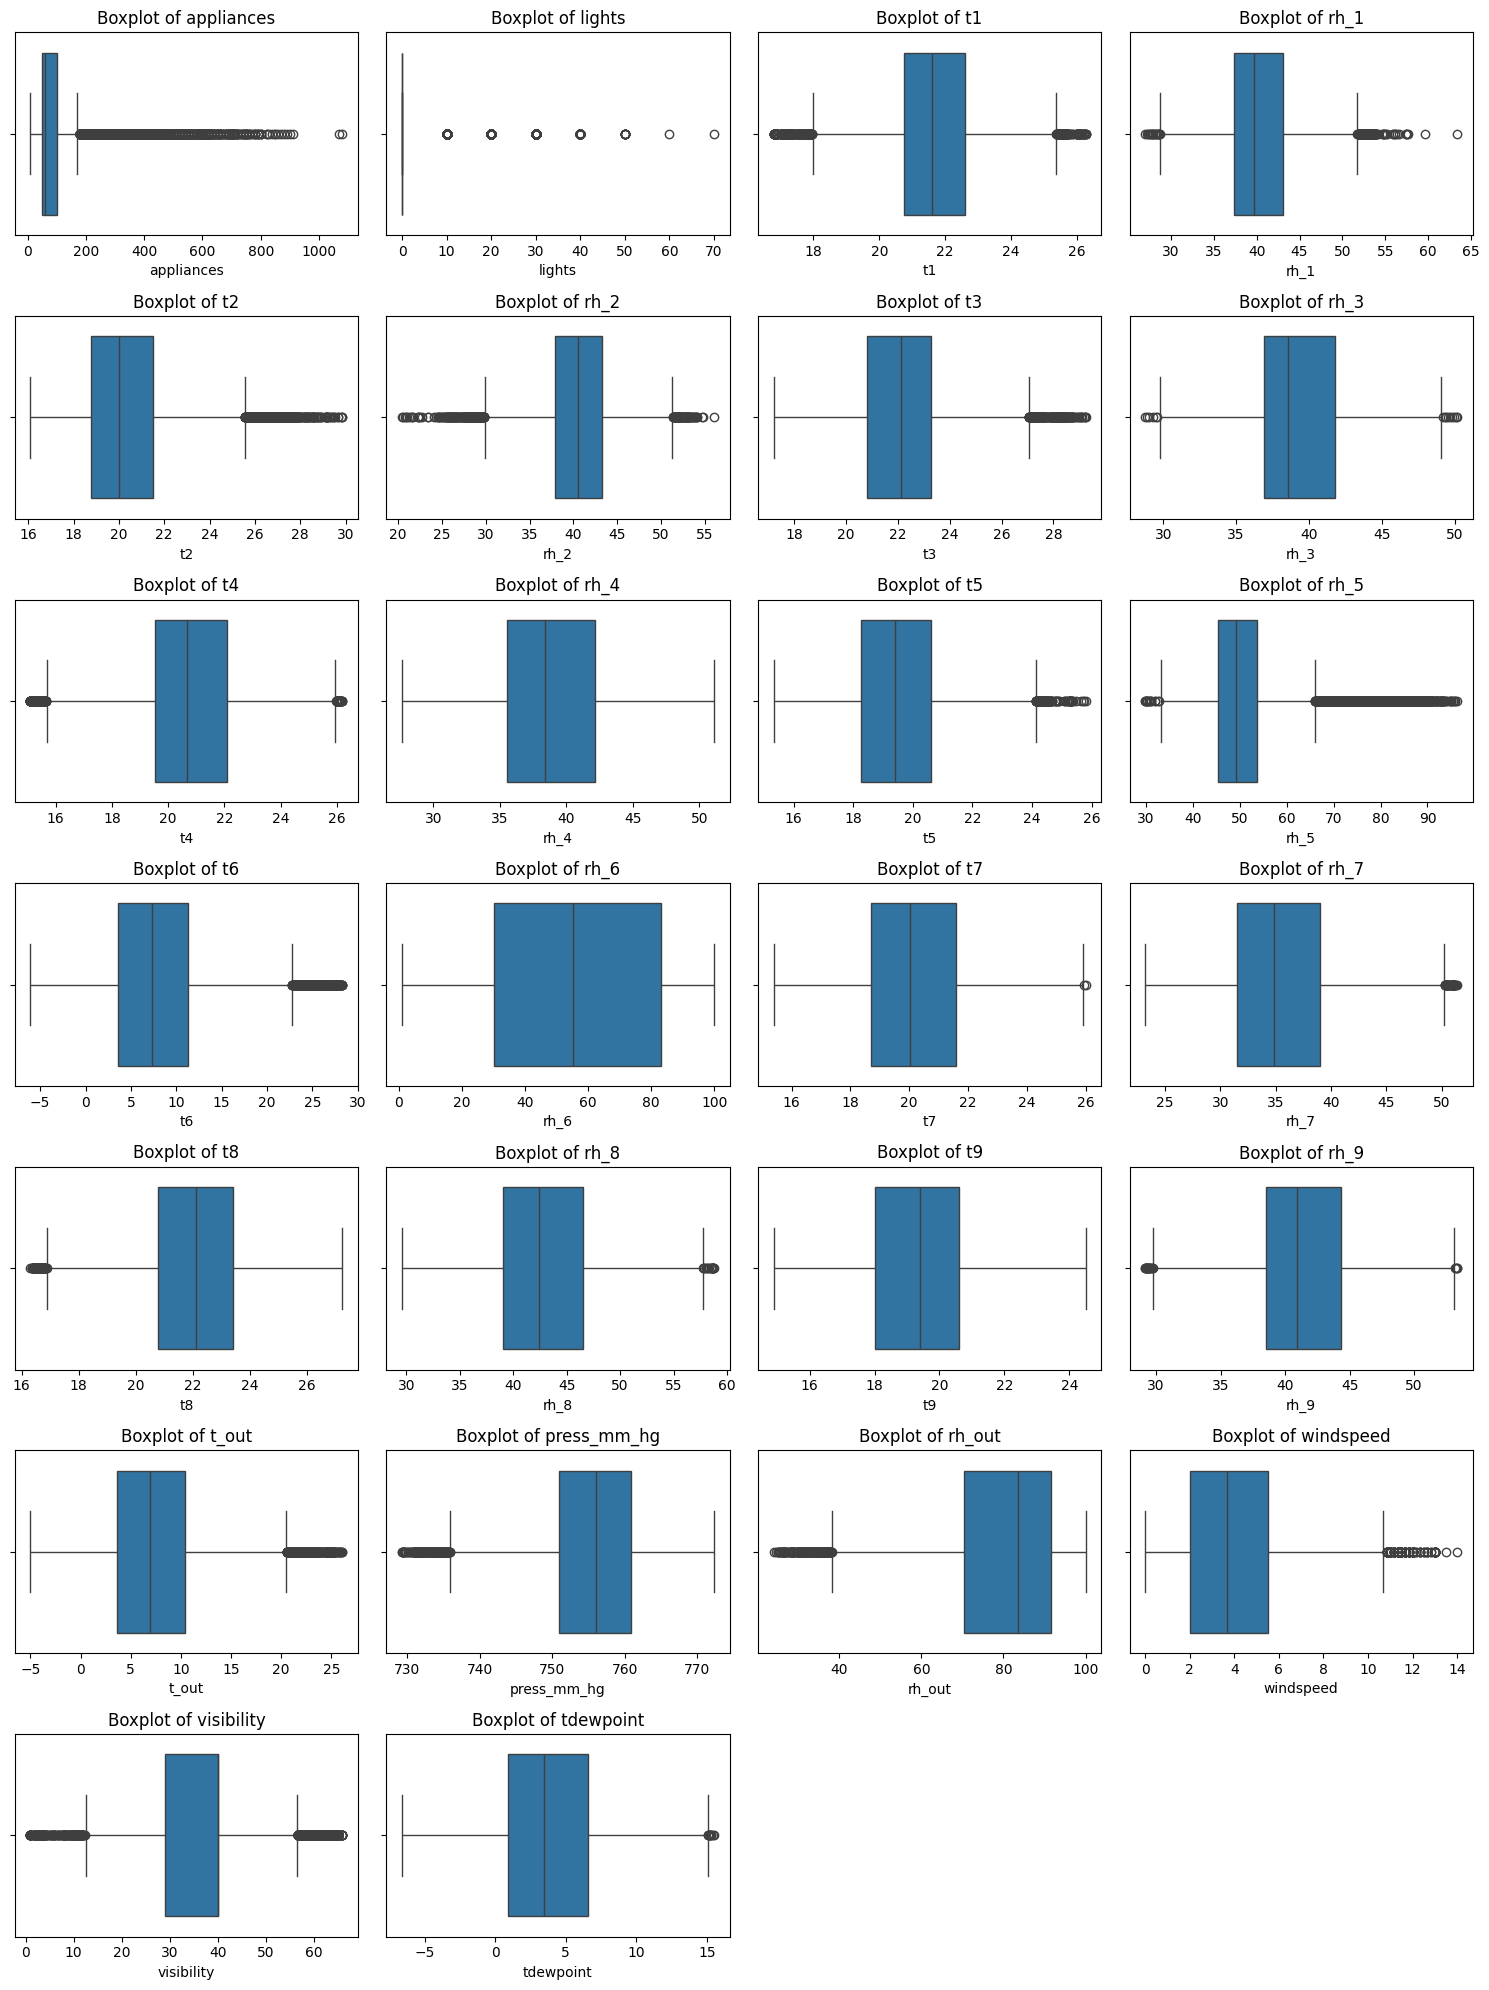

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))  # Adjust figure size to accommodate more plots

# Loop through numeric columns and plot boxplots
for i, col in enumerate(numeric_columns):
    plt.subplot(7, 4, i + 1)  # Changed layout to 7x4 to fit 26 boxplots
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

# **05) Data Preprocessing Before the split**

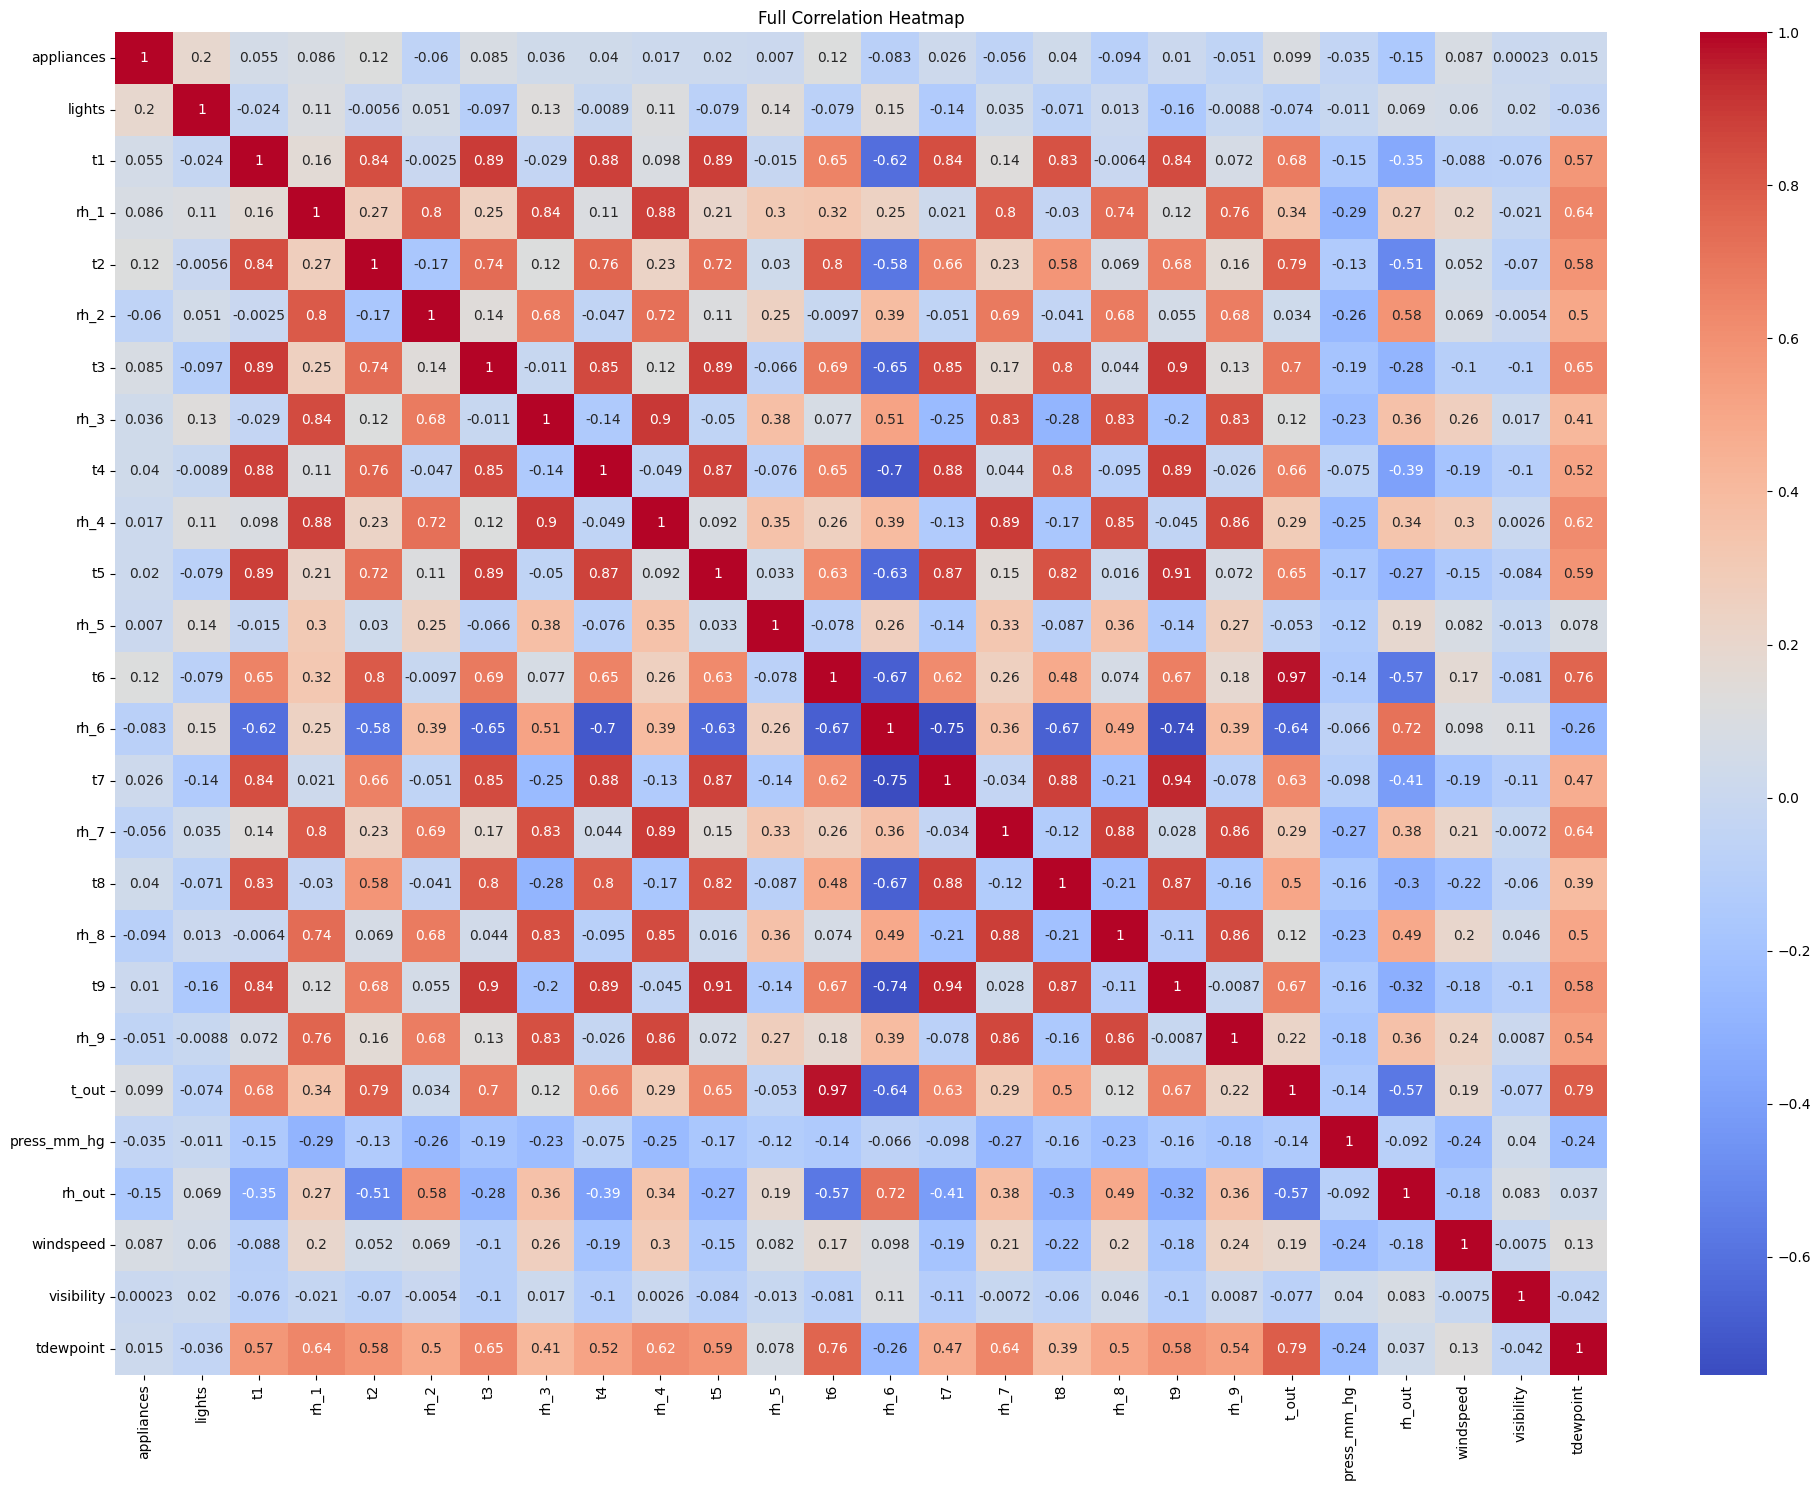

Features with |correlation| > 0.1 with 'appliances':
['lights', 't2', 't6', 'rh_out']


In [ ]:
# Dynamically get the list of numeric columns
numeric_columns = df.select_dtypes(include='number').columns.tolist()

# Calculate the correlation matrix for numeric columns only
correlation_matrix = df[numeric_columns].corr()

# Plot the full correlation heatmap
plt.figure(figsize=(20, 15))  # Set figure size to ensure the heatmap is readable
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add title and layout adjustments for clarity
plt.title('Full Correlation Heatmap')
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

# Compare correlations with the target variable 'appliances'
target_correlations = correlation_matrix['appliances']

# Select features with correlations > 0.5 or < -0.5 with 'appliances'
selected_features = target_correlations[(target_correlations.abs() > 0.1) & (target_correlations.index != 'appliances')].index.tolist()

# Print the selected features
print("Features with |correlation| > 0.1 with 'appliances':")
print(selected_features)

**Weak Correlation**

The features `['lights', 't2', 't6', 'rh_out']` show only weak correlations with the target variable `appliances`, all having correlation values greater than 0.1 but still relatively low. This suggests that these features have a minimal linear relationship with the energy consumption of appliances.

**Limited Predictive Power**

Since the correlations are weak, these features alone may not be strong predictors for energy consumption in appliances. A low correlation indicates that other factors, not captured by these features, might influence appliance usage.

**Because of weak correlation , we did not selected specific features from correlation matrix and we selected all the features due to the error was high with selected features**



In [ ]:
scaler = MinMaxScaler()
df1 = df.drop(columns=['date']) #drop date because date cannot be normalised
normalised_data = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns) #normalise data
x = normalised_data.drop(['appliances'], axis=1) #create feature data by removing the target which appliances
y = normalised_data['appliances'] #create target data

# **06) Train-Test split**

In [ ]:
# Split the data into training and testing sets
# Use an 70-30 split, with 70% of the data for training and 30% for testing
# Set random_state for reproducibility
x_train, x_test, y_train, y_test = train_test_split( x, y,test_size=0.3, random_state=42)

# Verify the shape of the splits
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (13814, 25)
x_test shape: (5921, 25)
y_train shape: (13814,)
y_test shape: (5921,)


# **07) Preprocessing After the split**


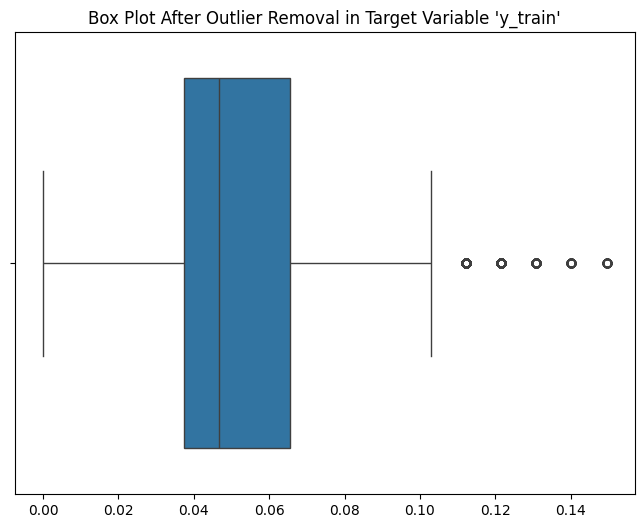

In [ ]:
# Calculate Q1, Q3, and IQR for y_train
Q1 = np.percentile(y_train, 25)
Q3 = np.percentile(y_train, 75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify indices of outliers
outlier_indices = np.where((y_train < lower_bound) | (y_train > upper_bound))[0]

# Remove outliers from x_train and y_train
x_train_cleaned = np.delete(x_train, outlier_indices, axis=0)
y_train_cleaned = np.delete(y_train, outlier_indices, axis=0)

# Visualize y_train after outlier removal
plt.figure(figsize=(8, 6))
sns.boxplot(x=y_train_cleaned)
plt.title("Box Plot After Outlier Removal in Target Variable 'y_train'")
plt.show()

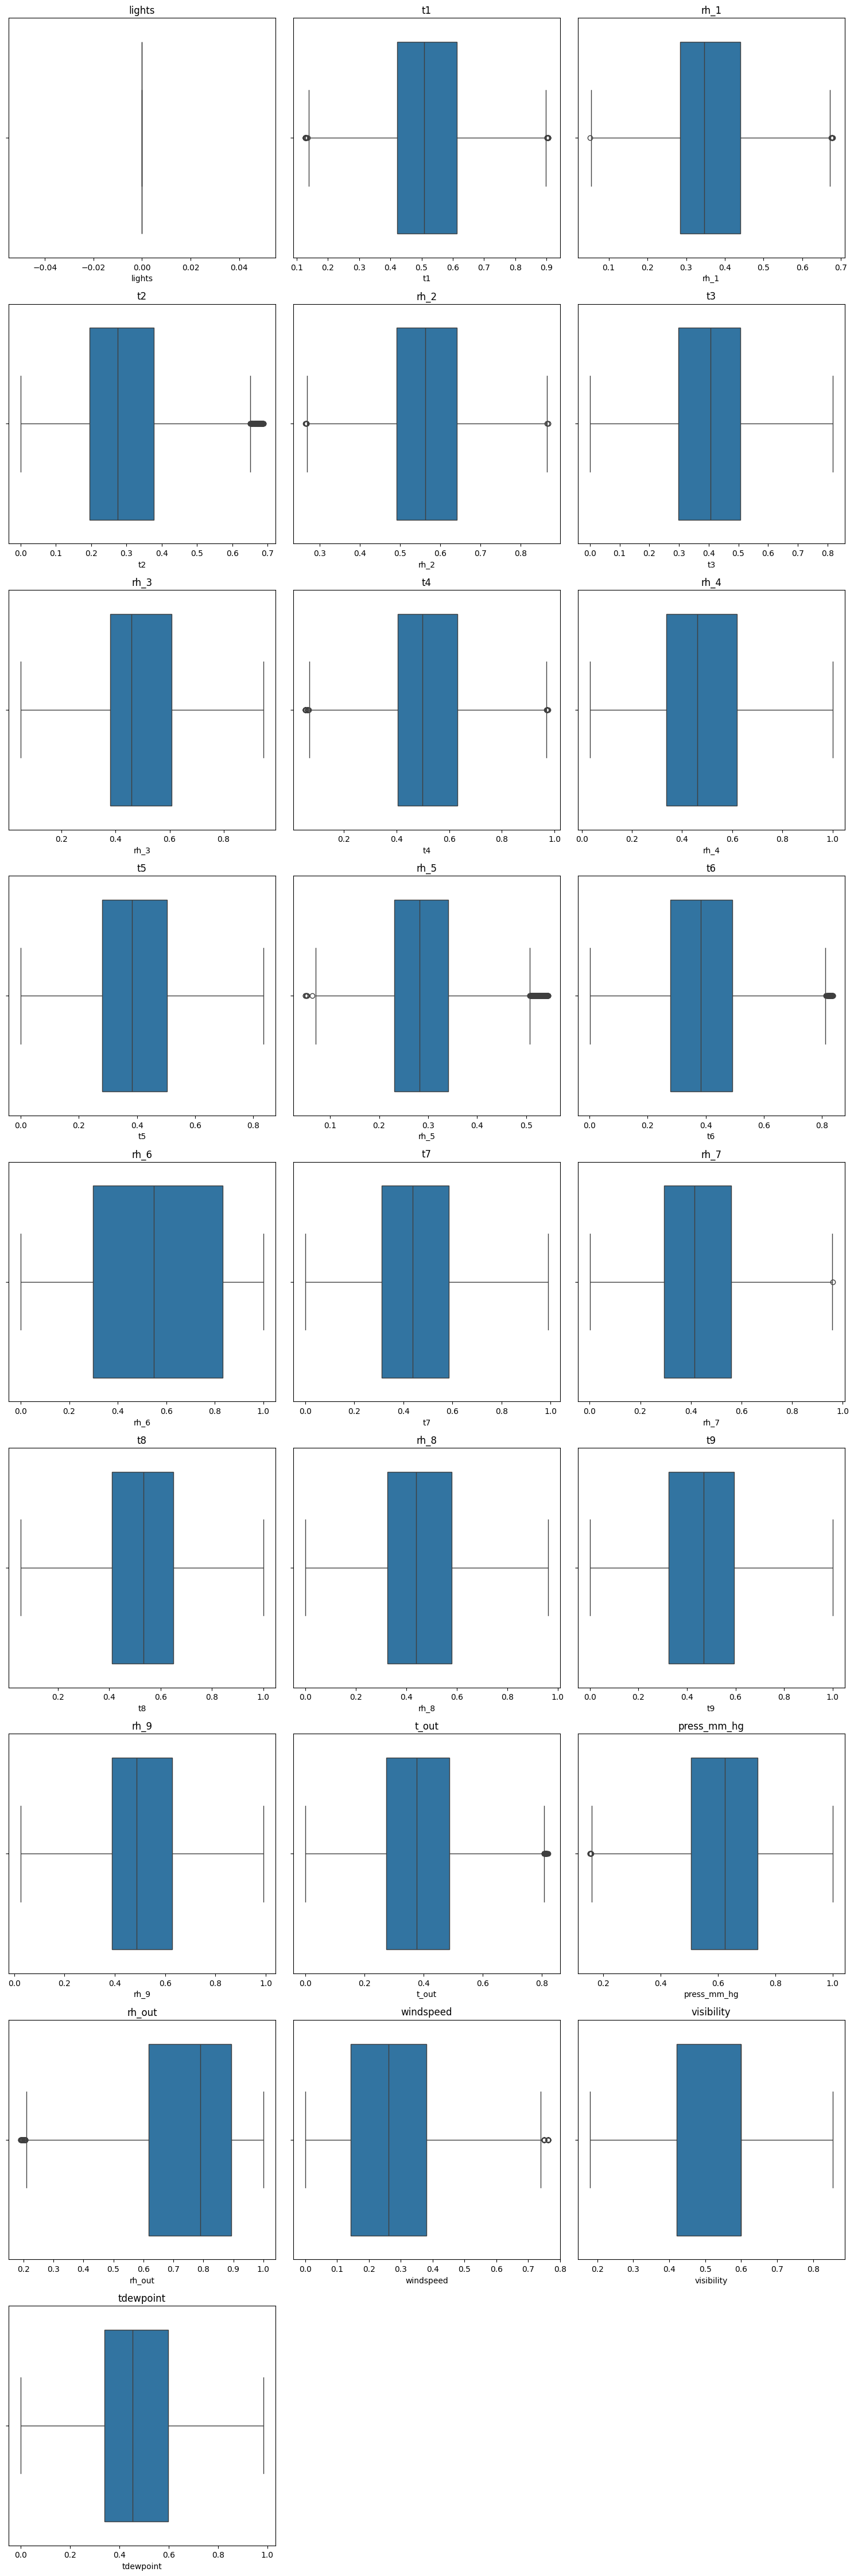

x_train_cleaned shape: (13809, 25)
y_train_cleaned shape: (13809,)


In [ ]:
# Create a grid layout for box plots
num_features = len(x_train.columns)
rows = (num_features + 2) // 3  # 3 columns per row
columns = 3  # Fixed number of columns

plt.figure(figsize=(15, rows * 5))  # Adjust the figure size dynamically

# Loop through each feature in x_train to remove outliers
for column_index, column in enumerate(x_train.columns):
    Q1 = np.percentile(x_train[column], 25)
    Q3 = np.percentile(x_train[column], 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find indices of outliers
    outlier_indices = np.where((x_train[column] < lower_bound) | (x_train[column] > upper_bound))[0]

    # Remove outliers from x_train
    x_train_cleaned = np.delete(x_train.values, outlier_indices, axis=0)  # Convert x_train to NumPy array first
    y_train_cleaned = np.delete(y_train, outlier_indices, axis=0)

    # Convert x_train_cleaned back to DataFrame to allow indexing by column name
    x_train_cleaned = pd.DataFrame(x_train_cleaned, columns=x_train.columns)

    # Plot each boxplot in the respective subplot
    plt.subplot(rows, columns, column_index + 1)
    sns.boxplot(x=x_train_cleaned[column])
    plt.title(f"{column}")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

# Verify the cleaned dataset shapes
print(f"x_train_cleaned shape: {x_train_cleaned.shape}")
print(f"y_train_cleaned shape: {y_train_cleaned.shape}")


## **Scale the Numerical Features**

In [ ]:
scaler = MinMaxScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train_cleaned), columns=x_train.columns)

# # Transform the testing data using the already fitted scaler
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

# # Optionally, you can also scale the target variable (y) if needed
y_train_scaled = scaler.fit_transform(y_train_cleaned.reshape(-1, 1))  # Reshape directly for scaler
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))  # Reshape for scaler # y_test is a Pandas Series

# # Verify the shapes of the scaled data
print(f"x_train_scaled shape: {x_train_scaled.shape}")
print(f"x_test_scaled shape: {x_test_scaled.shape}")
print(f"y_train_scaled shape: {y_train_scaled.shape}")
print(f"y_test_scaled shape: {y_test_scaled.shape}")

x_train_scaled shape: (13809, 25)
x_test_scaled shape: (5921, 25)
y_train_scaled shape: (13809, 1)
y_test_scaled shape: (5921, 1)


# **08) Machine Learning Model Implementation**

##**Grid Search Implementation**

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor

# # Decision Tree Model - Hyperparameter Tuning
# # Define the parameter grid for the Decision Tree Regressor
# dt_param_grid = {
#     'max_depth': [10, 15, 20, None],
#     'min_samples_split': [2, 10, 20],
#     'min_samples_leaf': [1, 5, 10],
#     'ccp_alpha': [0.00001, 0.001, 0.01, 0.1]
# }

# # Initialize the Decision Tree Regressor
# dt_model = DecisionTreeRegressor(random_state=42)

# # Set up GridSearchCV for Decision Tree
# dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, n_jobs=-1)
# dt_grid_search.fit(x_train_scaled, y_train_scaled)

# # Best parameters and model for Decision Tree
# print("Best parameters for Decision Tree:", dt_grid_search.best_params_)
# best_dt_model = dt_grid_search.best_estimator_

# # Linear Regression Model - Hyperparameter Tuning
# # Linear Regression has no hyperparameters to tune (but we can use a GridSearch for testing)
# lr_model = LinearRegression()

# # Set up GridSearchCV for Linear Regression (optional, as there are no hyperparameters to tune)
# lr_grid_search = GridSearchCV(estimator=lr_model, param_grid={}, cv=5, n_jobs=-1)
# lr_grid_search.fit(x_train_scaled, y_train_scaled)

# # Best parameters for Linear Regression (no change expected)
# print("Best parameters for Linear Regression:", lr_grid_search.best_params_)
# best_lr_model = lr_grid_search.best_estimator_

# # Random Forest Model - Hyperparameter Tuning
# # Define the parameter grid for the Random Forest Regressor
# rf_param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [10, 15, 20, None],
#     'min_samples_split': [2, 10, 20],
#     'min_samples_leaf': [1, 5, 10],
#     'bootstrap': [True, False]
# }

# # Initialize the Random Forest Regressor
# rf_model = RandomForestRegressor(random_state=42)

# # Set up GridSearchCV for Random Forest
# rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1)
# rf_grid_search.fit(x_train_scaled, y_train_scaled)

# # Best parameters and model for Random Forest
# print("Best parameters for Random Forest:", rf_grid_search.best_params_)
# best_rf_model = rf_grid_search.best_estimator_

# # Train the models with the best parameters
# best_dt_model.fit(x_train_scaled, y_train_scaled)
# best_lr_model.fit(x_train_scaled, y_train_scaled)
# best_rf_model.fit(x_train_scaled, y_train_scaled)


We decided to use **Random Search** for hyperparameter tuning instead of **Grid Search** due to its efficiency in **time and resource usage.** While Grid Search systematically evaluates all combinations of hyperparameters, it can be extremely **time-consuming, especially with a large number of hyperparameters or when computational resources are limited.** Random Search, on the other hand, randomly samples hyperparameter combinations and is often able to find optimal or near-optimal parameters much faster. This approach allows us to allocate resources more effectively and focus on other aspects of model improvement.

##**Random Search Implementation**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Decision Tree Model - Hyperparameter Tuning
# Define the parameter grid for the Decision Tree Regressor
dt_param_dist = {
    'max_depth': [5, 10, 15, 20, 25, None],  # Expanded depth range
    'min_samples_split': [2, 5, 10, 15, 20],  # Added intermediate splits
    'min_samples_leaf': [1, 2, 5, 10, 15],  # Added smaller leaf sizes
    'ccp_alpha': [0.0, 0.0001, 0.001, 0.01, 0.1]  # Included zero alpha
}

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Set up RandomizedSearchCV for Decision Tree
dt_random_search = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=dt_param_dist,
    n_iter=100,  # Increased iterations for a thorough search
    cv=10,  # 10-fold cross-validation for more reliability
    scoring='neg_mean_squared_error',  # Use negative MSE for regression
    n_jobs=-1,  # Utilize all available cores
    random_state=42,
    verbose=2  # Print progress
)
dt_random_search.fit(x_train_scaled, y_train_scaled)

# Best parameters and model for Decision Tree
print("Best parameters for Decision Tree:", dt_random_search.best_params_)
best_dt_model = dt_random_search.best_estimator_

# Linear Regression Model (no parameters to tune)
lr_model = LinearRegression()
lr_model.fit(x_train_scaled, y_train_scaled)
print("Linear Regression doesn't require hyperparameter tuning.")

# # Random Forest Model - Hyperparameter Tuning
# # Define the parameter grid for the Random Forest Regressor
# rf_param_dist = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [5, 10, 15, 20, 25, None],
#     'min_samples_split': [2, 5, 10, 15, 20],
#     'min_samples_leaf': [1, 2, 5, 10, 15],
#     'bootstrap': [True, False]
# }

# # Initialize the Random Forest Regressor
# rf_model = RandomForestRegressor(random_state=42)

# # Set up RandomizedSearchCV for Random Forest
# rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_dist,
#                                       n_iter=50, cv=5, n_jobs=-1, random_state=42)
# rf_random_search.fit(x_train_scaled, y_train_scaled)

# # Best parameters and model for Random Forest
# print("Best parameters for Random Forest:", rf_random_search.best_params_)
# best_rf_model = rf_random_search.best_estimator_

# Train the models with the best parameters
best_dt_model.fit(x_train_scaled, y_train_scaled)
lr_model.fit(x_train_scaled, y_train_scaled)  # Already trained
# best_rf_model.fit(x_train_scaled, y_train_scaled)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Decision Tree: {'min_samples_split': 15, 'min_samples_leaf': 10, 'max_depth': 25, 'ccp_alpha': 0.0}
Linear Regression doesn't require hyperparameter tuning.


LinearRegression()

## **Cross-Validation**

In [ ]:
# Perform 5-fold cross-validation on the Decision Tree model
# It evaluates the model's performance by dividing the data into 5 subsets
# Each subset is used as a test set once, while the remaining are used for training
dt_scores = cross_val_score(best_dt_model, x_train_scaled, y_train_scaled, cv=5)

# Perform 5-fold cross-validation on the Linear Regression model
lr_scores = cross_val_score(lr_model, x_train_scaled, y_train_scaled, cv=5)

# Output cross-validation results for the Decision Tree model
print("Decision Tree Cross-validation scores:", dt_scores)
print("Decision Tree Mean score:", dt_scores.mean())        # Average score across folds
print("Decision Tree Average accuracy:", dt_scores.mean())  # Average accuracy as mean of scores
print("Decision Tree std:", dt_scores.std())                # Standard deviation to measure score variability

# Output cross-validation results for the Linear Regression model
print("Linear Regression Cross-validation scores:", lr_scores)
print("Linear Regression Mean score:", lr_scores.mean())        # Average score across folds
print("Linear Regression Average accuracy:", lr_scores.mean())  # Average accuracy as mean of scores
print("Linear Regression std:", lr_scores.std())                # Standard deviation to measure score variability

# # Output cross-validation results for the Random Forest
# rf_scores = cross_val_score(best_rf_model, x_train_scaled, y_train_scaled, cv=5)
# print("Random Forest Cross-validation scores:", rf_scores)



Decision Tree Cross-validation scores: [0.24505819 0.25141647 0.25091163 0.19899768 0.21287225]
Decision Tree Mean score: 0.23185124250013528
Decision Tree Average accuracy: 0.23185124250013528
Decision Tree std: 0.021725922253663515
Linear Regression Cross-validation scores: [0.11620583 0.17659207 0.17110684 0.15027108 0.17855921]
Linear Regression Mean score: 0.15854700520873077
Linear Regression Average accuracy: 0.15854700520873077
Linear Regression std: 0.02343129646339196


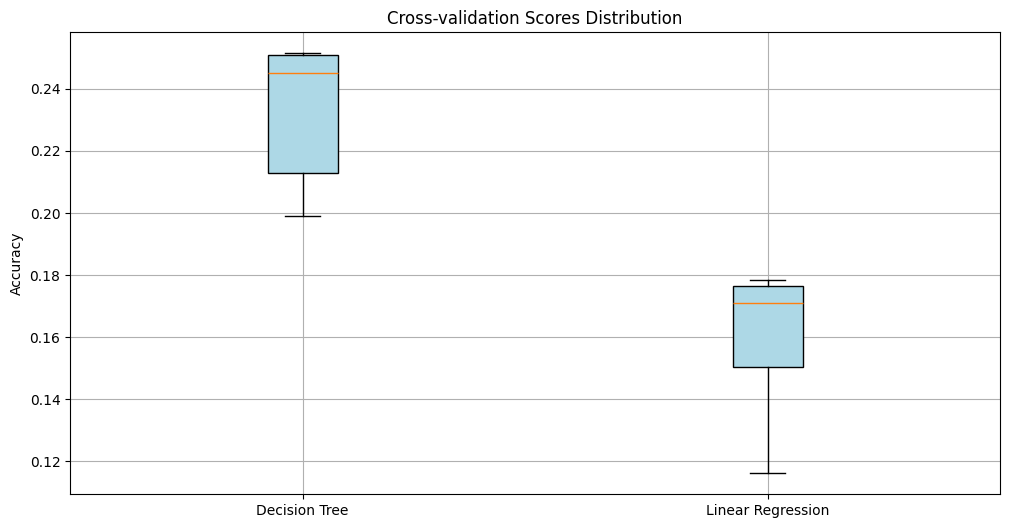

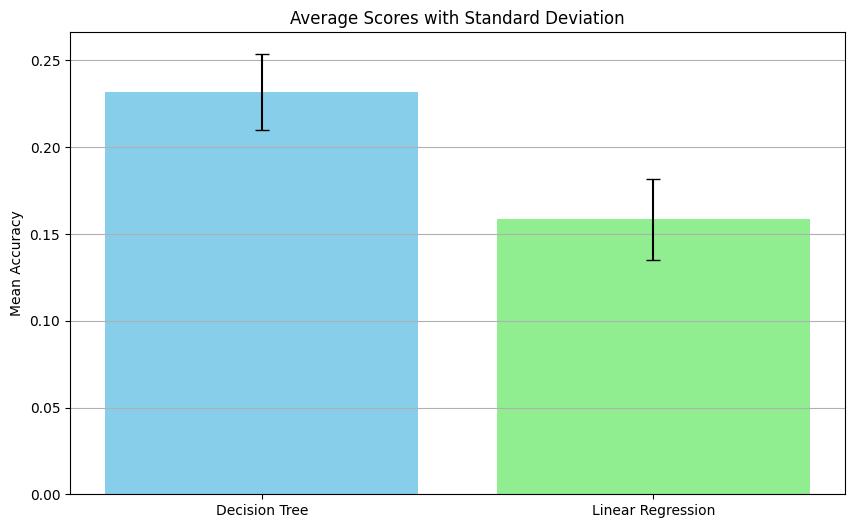

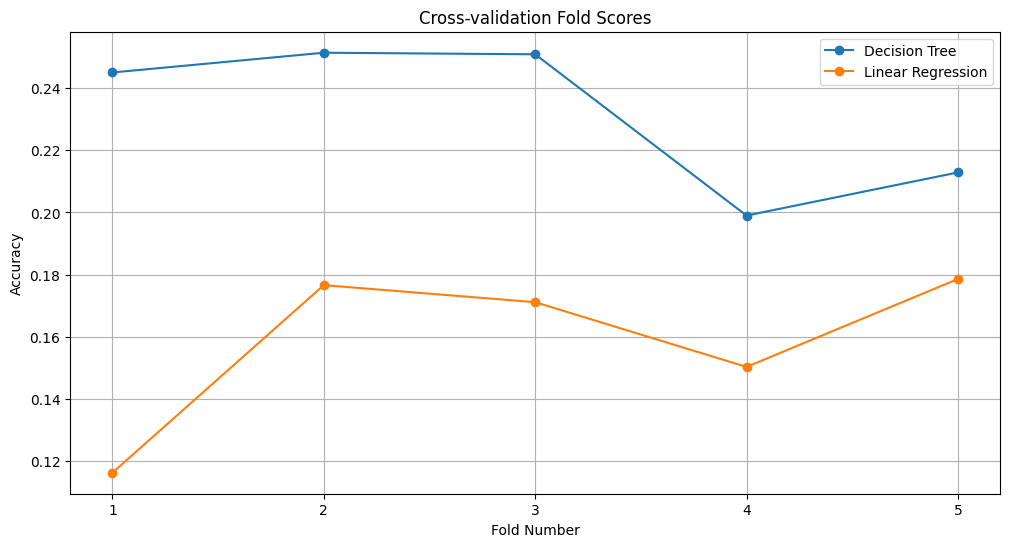

In [ ]:
# Data
models = ['Decision Tree', 'Linear Regression']
scores = [dt_scores, lr_scores]

# Calculate statistics
means = [np.mean(dt_scores), np.mean(lr_scores)]
stds = [np.std(dt_scores), np.std(lr_scores)]

# 1. Boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(scores, labels=models, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title('Cross-validation Scores Distribution')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# 2. Bar Chart for Mean Scores with Error Bars
plt.figure(figsize=(10, 6))
plt.bar(models, means, yerr=stds, color=['skyblue', 'lightgreen'], capsize=5)
plt.title('Average Scores with Standard Deviation')
plt.ylabel('Mean Accuracy')
plt.grid(True, axis='y')
plt.show()

# 3. Line Plot for Fold Scores
plt.figure(figsize=(12, 6))
for i, score in enumerate(scores):
    plt.plot(range(1, 6), score, marker='o', label=models[i])
plt.title('Cross-validation Fold Scores')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True)
plt.show()

# **09) Model Evaluation**

In [ ]:

# Decision Tree Model Evaluation
# Make predictions on the scaled test data
dt_pred_test = best_dt_model.predict(x_test_scaled)
# Make predictions on the scaled training data
dt_pred_train = best_dt_model.predict(x_train_scaled)

# Calculate MSE for both test and train predictions
dt_mse_test = mean_squared_error(y_test_scaled, dt_pred_test)
dt_mse_train = mean_squared_error(y_train_scaled, dt_pred_train)

# Calculate MAE for both test and train predictions
dt_mae_test = mean_absolute_error(y_test_scaled, dt_pred_test)
dt_mae_train = mean_absolute_error(y_train_scaled, dt_pred_train)

# Calculate RMSE for both test and train predictions
dt_rmse_test = np.sqrt(dt_mse_test)
dt_rmse_train = np.sqrt(dt_mse_train)

# Calculate R^2 score for both test and train predictions
dt_r2_test = r2_score(y_test_scaled, dt_pred_test)
dt_r2_train = r2_score(y_train_scaled, dt_pred_train)

# Linear Regression Model Evaluation
# Make predictions on the scaled test data
lr_pred_test = lr_model.predict(x_test_scaled)
# Make predictions on the scaled training data
lr_pred_train = lr_model.predict(x_train_scaled)

# Calculate MSE for both test and train predictions
lr_mse_test = mean_squared_error(y_test_scaled, lr_pred_test)
lr_mse_train = mean_squared_error(y_train_scaled, lr_pred_train)

# Calculate MAE for both test and train predictions
lr_mae_test = mean_absolute_error(y_test_scaled, lr_pred_test)
lr_mae_train = mean_absolute_error(y_train_scaled, lr_pred_train)

# Calculate RMSE for both test and train predictions
lr_rmse_test = np.sqrt(lr_mse_test)
lr_rmse_train = np.sqrt(lr_mse_train)

# Calculate R^2 score for both test and train predictions
lr_r2_test = r2_score(y_test_scaled, lr_pred_test)
lr_r2_train = r2_score(y_train_scaled, lr_pred_train)

# # Random Forest Model Evaluation
# # Make predictions on the unscaled test data
# rf_pred_test = best_rf_model.predict(x_test_scaled)
# # Make predictions on the unscaled training data
# rf_pred_train = best_rf_model.predict(x_train_scaled)

# # Calculate MSE for both test and train predictions
# rf_mse_test = mean_squared_error(y_test_scaled, rf_pred_test)
# rf_mse_train = mean_squared_error(y_train_scaled, rf_pred_train)

# # Calculate MAE for both test and train predictions
# rf_mae_test = mean_absolute_error(y_test_scaled, rf_pred_test)
# rf_mae_train = mean_absolute_error(y_train_scaled, rf_pred_train)

# # Calculate RMSE for both test and train predictions
# rf_rmse_test = np.sqrt(rf_mse_test)
# rf_rmse_train = np.sqrt(rf_mse_train)

# # Calculate R^2 score for both test and train predictions
# rf_r2_test = r2_score(y_test_scaled, rf_pred_test)
# rf_r2_train = r2_score(y_train_scaled, rf_pred_train)

# Display Model Evaluation Results
print("\nModel Evaluation Results:")

# Decision Tree results
print("Decision Tree:")
print(f"Train MSE: {dt_mse_train:.2f} | Test MSE: {dt_mse_test:.2f}")
print(f"Train MAE: {dt_mae_train:.2f} | Test MAE: {dt_mae_test:.2f}")
print(f"Train RMSE: {dt_rmse_train:.2f} | Test RMSE: {dt_rmse_test:.2f}")
print(f"Train R2 Score: {dt_r2_train:.2f} | Test R2 Score: {dt_r2_test:.2f}")

# Linear Regression results
print("\nLinear Regression:")
print(f"Train MSE: {lr_mse_train:.2f} | Test MSE: {lr_mse_test:.2f}")
print(f"Train MAE: {lr_mae_train:.2f} | Test MAE: {lr_mae_test:.2f}")
print(f"Train RMSE: {lr_rmse_train:.2f} | Test RMSE: {lr_rmse_test:.2f}")
print(f"Train R2 Score: {lr_r2_train:.2f} | Test R2 Score: {lr_r2_test:.2f}")

# # Random Forest results
# print("\nRandom Forest:")
# print(f"Train MSE: {rf_mse_train:.2f} | Test MSE: {rf_mse_test:.2f}")
# print(f"Train MAE: {rf_mae_train:.2f} | Test MAE: {rf_mae_test:.2f}")
# print(f"Train RMSE: {rf_rmse_train:.2f} | Test RMSE: {rf_rmse_test:.2f}")
# print(f"Train R2 Score: {rf_r2_train:.2f} | Test R2 Score: {rf_r2_test:.2f}")



Model Evaluation Results:
Decision Tree:
Train MSE: 0.00 | Test MSE: 0.01
Train MAE: 0.03 | Test MAE: 0.04
Train RMSE: 0.06 | Test RMSE: 0.08
Train R2 Score: 0.59 | Test R2 Score: 0.26

Linear Regression:
Train MSE: 0.01 | Test MSE: 0.01
Train MAE: 0.05 | Test MAE: 0.05
Train RMSE: 0.09 | Test RMSE: 0.09
Train R2 Score: 0.16 | Test R2 Score: 0.17


## **Results plots**

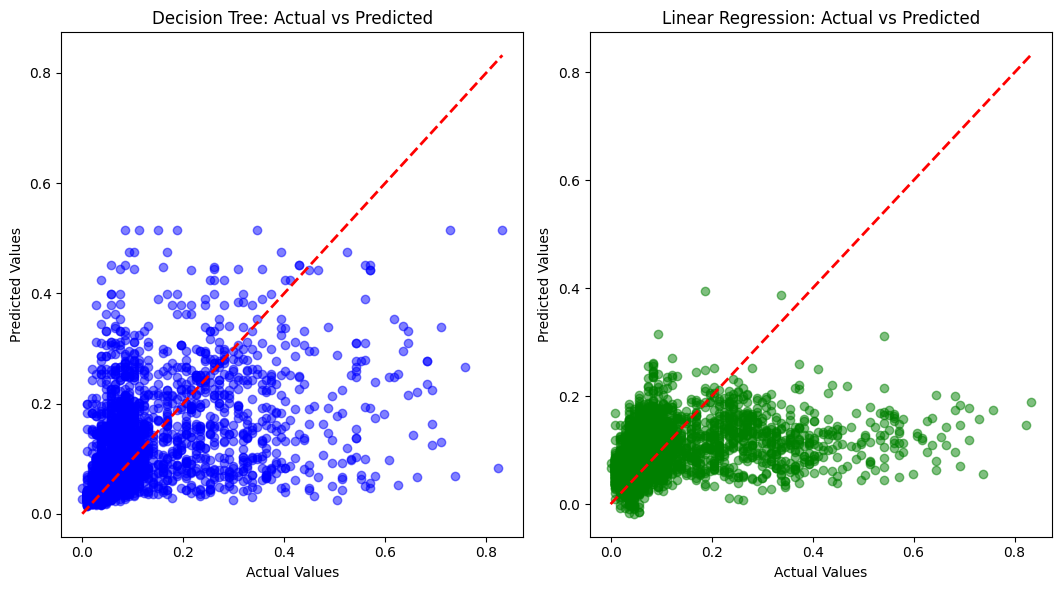

In [ ]:
# Set up a larger figure for the subplots
plt.figure(figsize=(16, 6))

# Decision Tree: Plotting Actual vs Predicted values
plt.subplot(1, 3, 1)
plt.scatter(y_test, dt_pred_test, alpha=0.5, color='blue')  # Scatter plot for actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line of perfect prediction
plt.title('Decision Tree: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Linear Regression: Plotting Actual vs Predicted values
plt.subplot(1, 3, 2)
plt.scatter(y_test, lr_pred_test, alpha=0.5, color='green')  # Scatter plot for actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line of perfect prediction
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# # Random Forest: Plotting Actual vs Predicted values
# plt.subplot(1, 3, 3)
# plt.scatter(y_test, rf_pred_test, alpha=0.5, color='purple')  # Scatter plot for actual vs predicted
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line of perfect prediction
# plt.title('Random Forest: Actual vs Predicted')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')

# Adjust layout to prevent overlap and improve visualization
plt.tight_layout()
plt.show()


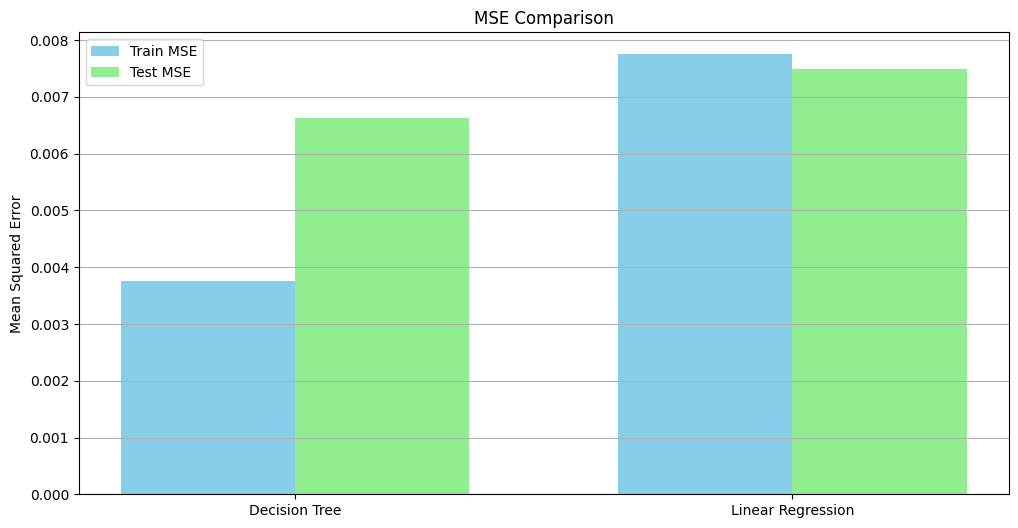

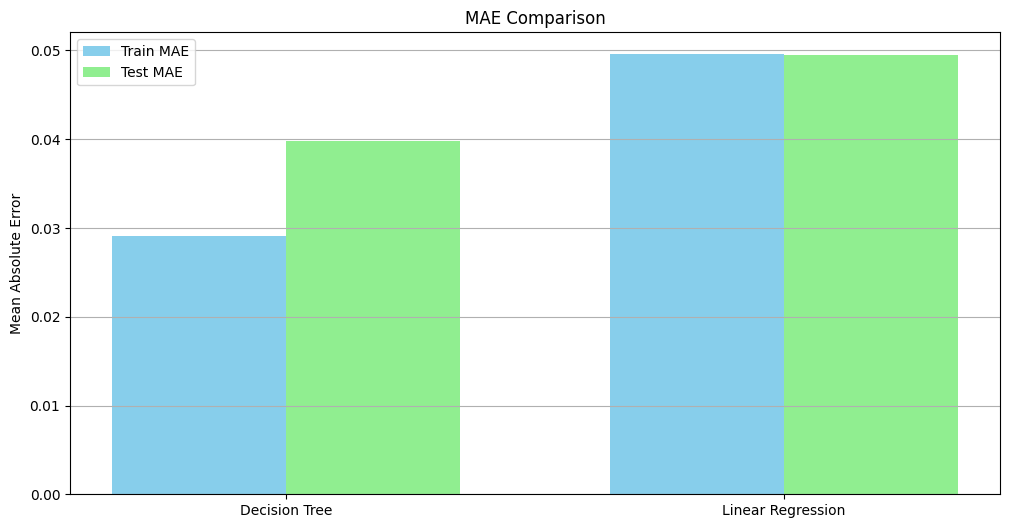

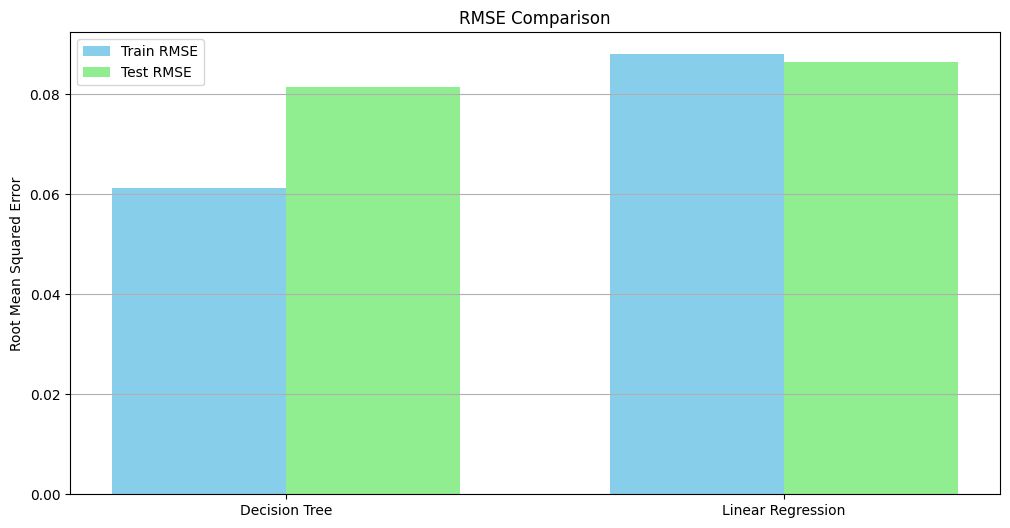

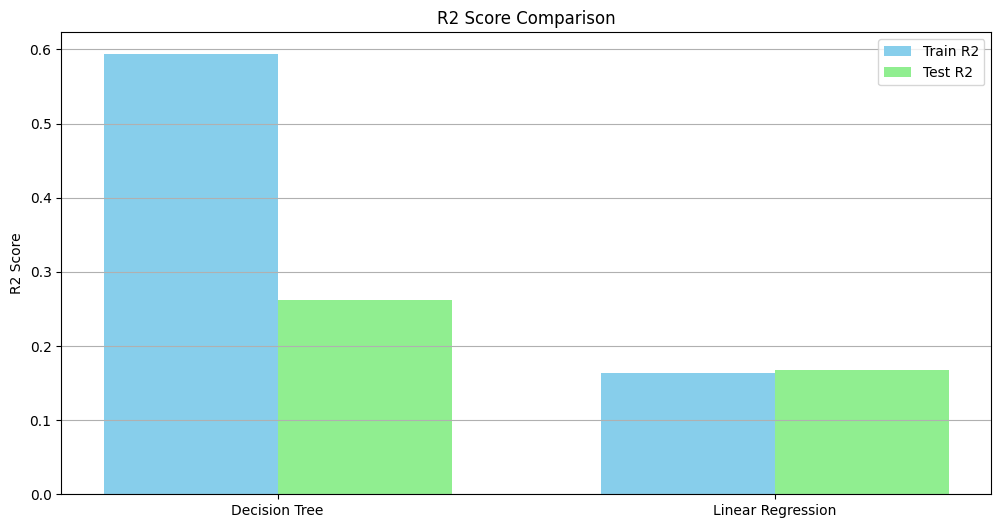

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data for visualization
models = ['Decision Tree', 'Linear Regression']
train_mse = [dt_mse_train, lr_mse_train]
test_mse = [dt_mse_test, lr_mse_test]
train_mae = [dt_mae_train, lr_mae_train]
test_mae = [dt_mae_test, lr_mae_test]
train_rmse = [dt_rmse_train, lr_rmse_train]
test_rmse = [dt_rmse_test, lr_rmse_test]
train_r2 = [dt_r2_train, lr_r2_train]
test_r2 = [dt_r2_test, lr_r2_test]

# 1. Bar chart for MSE
plt.figure(figsize=(12, 6))
x = np.arange(len(models))
width = 0.35
plt.bar(x - width/2, train_mse, width, label='Train MSE', color='skyblue')
plt.bar(x + width/2, test_mse, width, label='Test MSE', color='lightgreen')
plt.xticks(x, models)
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison')
plt.legend()
plt.grid(True, axis='y')
plt.show()

# 2. Bar chart for MAE
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, train_mae, width, label='Train MAE', color='skyblue')
plt.bar(x + width/2, test_mae, width, label='Test MAE', color='lightgreen')
plt.xticks(x, models)
plt.ylabel('Mean Absolute Error')
plt.title('MAE Comparison')
plt.legend()
plt.grid(True, axis='y')
plt.show()

# 3. Bar chart for RMSE
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, train_rmse, width, label='Train RMSE', color='skyblue')
plt.bar(x + width/2, test_rmse, width, label='Test RMSE', color='lightgreen')
plt.xticks(x, models)
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE Comparison')
plt.legend()
plt.grid(True, axis='y')
plt.show()

# 4. Bar chart for R2 Score
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, train_r2, width, label='Train R2', color='skyblue')
plt.bar(x + width/2, test_r2, width, label='Test R2', color='lightgreen')
plt.xticks(x, models)
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison')
plt.legend()
plt.grid(True, axis='y')
plt.show()


# **10) Conclusion**

1. **Decision Tree**:
   - Performance: Moderate overfitting. The train R² score (0.59) is significantly higher than the test R² score (0.26).
   - Errors are minimal but not the lowest among the three models. Test errors are always higher than train error significantly.

- Not recommended model for energy prediction according to given data. Because model is struggling to fit to data but there is low error on both test and train data. Eventhough model is moderatley overfitting the error is low indicating model should be more generalized. Not mostly reliable for used in energy prediction. Even after hyperparamter tuning not much effective results obtained from the model.

2. **Linear Regression**:
   - Consistent performance on both train and test data
   - Modest predictive power (R2 around 0.16-0.17)
- Workable for simple use cases but very limited predictive capability. R2 value is low. therfore underfit model. But there is a low train and test errors. Which indicates that model is relatively good and also more generalized model than decision tree model.

**Final Conclusion:**
Considering the linear regression and decision tree models best model is linear regression because decision tree model is moderately overfitting but linear regression model is more generalized in predicting appliances energy usage.
Linear regression is good to use on simple data because model lacks complexity.

On the other hand each model has low MSE, MAE and RMSE values. Low error on every model. Also low R2 value is often observed when the data contains a lot of randomness or noise, making it difficult to model. Which in this case may be true. Because of this these model are not complex enough to adapt to the variability in data. By using more complex models we can expect more efficinet model to predict appliances enrgy usage.